In [85]:
import pandas as pd
import numpy as np
import missingno as msno

In [86]:
df = pd.read_excel("groupby_interpolated.xlsx")

In [87]:
df

,STATION CODE,LOCATION,RIVER,STATE,TEMPERATURE,DISSOLVED OXYGEN,PH,CONDUCTIVITY,BOD,NITRATE,TOTAL COLIFORM,YEAR
0,1,"SABARMATI AT DHAROI DAM, GUJARAT",SABARMATI,GUJARAT,28.00,8.20,8.40,593.0,3.00,0.300,15.0,2008
1,1,"SABARMATI AT DHAROI DAM, GUJARAT",SABARMATI,GUJARAT,30.00,6.77,8.30,1693.5,38.60,1.950,110.0,2016
2,1,"SABARMATI AT DHAROI DAM, GUJARAT",SABARMATI,GUJARAT,28.00,7.20,7.78,343.5,1.95,0.074,20.0,2017
3,1,"SABARMATI AT DHAROI DAM, GUJARAT",SABARMATI,GUJARAT,27.75,7.40,8.05,466.0,1.55,0.395,12.5,2018
4,1,"SABARMATI AT DHAROI DAM, GUJARAT",SABARMATI,GUJARAT,27.50,7.60,7.25,452.0,0.85,0.200,47.5,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
9935,20048,SWARG-ASHRAM -1,GANGA,UTTARAKHAND,20.00,9.70,8.00,198.5,1.00,0.000,140.0,2019
9936,20049,LAKKAR GHAT- OXIDATION PONDS,GANGA,UTTARAKHAND,NaN,NaN,7.80,NaN,33.00,NaN,NaN,2018
9937,20049,LAKKAR GHAT- OXIDATION PONDS,GANGA,UTTARAKHAND,23.50,9.50,8.10,195.0,1.00,NaN,130.0,2019
9938,30052,CAUVERY AT AJJIBORE (BANGALORE),CAUVERY,KARNATAKA,NaN,NaN,8.30,498.5,0.20,0.190,330.0,2018


In [88]:
df.isnull().sum()

STATION CODE          0
LOCATION              0
RIVER                 0
STATE                 0
TEMPERATURE          48
DISSOLVED OXYGEN     65
PH                    0
CONDUCTIVITY        160
BOD                  40
NITRATE             475
TOTAL COLIFORM      583
YEAR                  0
dtype: int64

<AxesSubplot:>

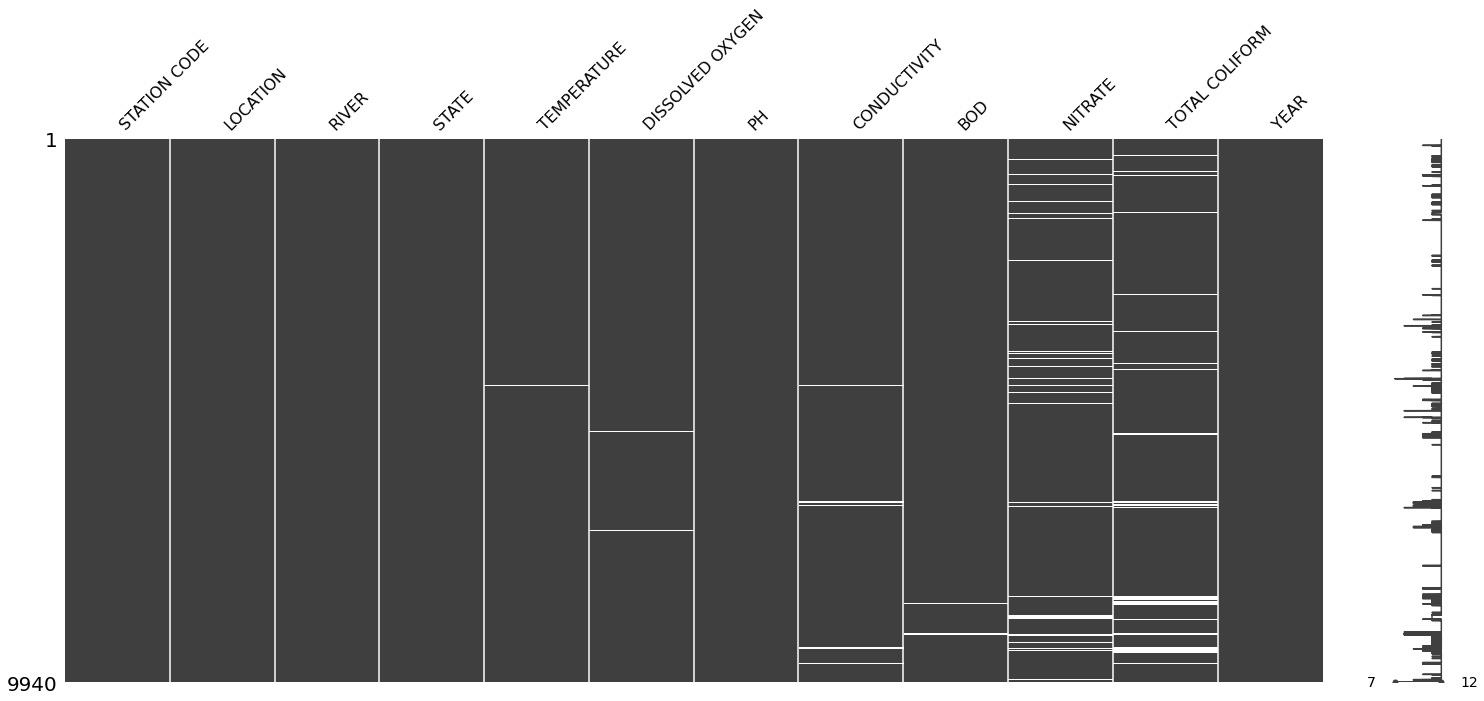

In [89]:
msno.matrix(df)

In [94]:
df[df['NITRATE'].isnull()]

,STATION CODE,LOCATION,RIVER,STATE,TEMPERATURE,DISSOLVED OXYGEN,PH,CONDUCTIVITY,BOD,NITRATE,TOTAL COLIFORM,YEAR
3351,1376,"CHAMBAL AT ETAWAH BEFORE CONFL. TO R. YAMUNA, ...",CHAMBAL,UTTAR PRADESH,23.8,8.40,8.00,455.0,2.00,NaN,213000.0,2008
3352,1376,"CHAMBAL AT ETAWAH BEFORE CONFL. TO R. YAMUNA, ...",CHAMBAL,UTTAR PRADESH,25.0,8.30,8.00,466.0,1.90,NaN,563273.0,2009
3353,1376,"CHAMBAL AT ETAWAH BEFORE CONFL. TO R. YAMUNA, ...",CHAMBAL,UTTAR PRADESH,26.5,8.50,7.90,480.0,1.60,NaN,228513.0,2010
3354,1376,"CHAMBAL AT ETAWAH BEFORE CONFL. TO R. YAMUNA, ...",CHAMBAL,UTTAR PRADESH,27.6,9.20,8.30,572.0,1.80,NaN,15460.0,2011
3619,1458,"IRIL AT PORAMPET, MANIPUR",IRIL,MANIPUR,26.0,7.90,7.80,196.0,0.80,NaN,73.0,2008
...,...,...,...,...,...,...,...,...,...,...,...,...
9902,10150,"MADHYA GANGA BARRAGE, BIJNORE",GANGA,UTTAR PRADESH,8.5,8.60,7.55,157.5,1.55,NaN,NaN,2019
9903,10151,FARRUKABAD,GANGA,UTTAR PRADESH,8.5,8.55,8.00,247.0,2.45,NaN,2650.0,2018
9904,10151,FARRUKABAD,GANGA,UTTAR PRADESH,24.5,8.55,8.00,221.0,2.15,NaN,2200.0,2019
9936,20049,LAKKAR GHAT- OXIDATION PONDS,GANGA,UTTARAKHAND,23.5,9.50,7.80,195.0,33.00,NaN,130.0,2018


In [90]:
for col in df.columns:
    for i in df[df[col].isnull()].index:
        if df[col][i]:
            stat_code = df['STATION CODE'][i]
            df[col][i] = df[df['STATION CODE'] == stat_code][col].mean()
            
df.to_excel("interpolatedmean.xlsx")

C:\Users\SHUBHA~1\AppData\Local\Temp/ipykernel_18416/434667011.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = df[df['STATION CODE'] == stat_code][col].mean()


In [91]:
df.isnull().sum()

STATION CODE          0
LOCATION              0
RIVER                 0
STATE                 0
TEMPERATURE           5
DISSOLVED OXYGEN      8
PH                    0
CONDUCTIVITY         15
BOD                  19
NITRATE             150
TOTAL COLIFORM      184
YEAR                  0
dtype: int64

In [92]:
df.shape

(9940, 12)